# Reconocedor de figuras de lego


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ahora ya es accesible

¿Estoy realmente utilizando una GPU? Compruébalo en **Editar / Configuración del cuaderno** o **Entorno de ejecuación / Cambiar tipo de entorno de ejecución**

LEGO


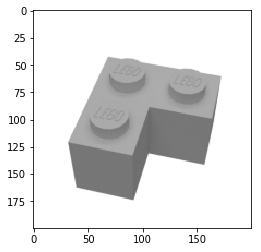

In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/datasets"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/datasets/LEGO/train/2357 Brick corner 1x2x2/201706171206-0001.png', 'r')
imshow(np.asarray(pil_im))



In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

## Primer modelo

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time


# DATA SOURCE --------------------------------------------------

batch_size = 100

train_data_dir = '/content/drive/My Drive/Colab Notebooks/datasets/LEGO/train'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/datasets/LEGO/valid'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

epochs = 10

model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=800,
)



Found 6379 images belonging to 16 classes.
Found 6379 images belonging to 16 classes.
Epoch 1/10
100/100 [==============================] - 133s 1s/step - loss: 1.6650 - acc: 0.4246 - val_loss: 0.7759 - val_acc: 0.7507
Epoch 2/10
100/100 [==============================] - 128s 1s/step - loss: 1.1793 - acc: 0.5805 - val_loss: 0.6059 - val_acc: 0.7827
Epoch 3/10
100/100 [==============================] - 126s 1s/step - loss: 0.9614 - acc: 0.6585 - val_loss: 0.3965 - val_acc: 0.8616
Epoch 4/10
100/100 [==============================] - 124s 1s/step - loss: 0.7605 - acc: 0.7208 - val_loss: 0.2897 - val_acc: 0.8950
Epoch 5/10
100/100 [==============================] - 128s 1s/step - loss: 0.6453 - acc: 0.7723 - val_loss: 0.2327 - val_acc: 0.9230
Epoch 6/10
100/100 [==============================] - 123s 1s/step - loss: 0.5978 - acc: 0.7832 - val_loss: 0.1891 - val_acc: 0.9340
Epoch 7/10
100/100 [==============================] - 128s 1s/step - loss: 0.4999 - acc: 0.8185 - val_loss: 0.1738 -